<a href="https://colab.research.google.com/github/Techbae22/1st-GMC_python_project/blob/main/Checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns

In [67]:
t_data = pd.read_csv("titanic.csv")
t_data.head() #This part shows the head of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
t_data.info() #This line shows the data type for each column and value count
# There are missing data in the #Age - #Cabin - #Embarked columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t_data.isnull().sum() #This is showing the number of missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
t_data['Age'] = t_data['Age'].fillna(t_data['Age'].mean()) #This code is to fill the missing data in the Age column


In [7]:
t_data['Age'].isnull().sum() #This means there is no more missing Data in the Age column

0

In [8]:
t_data['Cabin'] = t_data['Cabin'].fillna(t_data['Cabin'].mode()[0]) #This is to fill in the missing data in the Cabin column

In [9]:
t_data['Cabin'].isnull().sum() #This confirms that there are no more missing values

0

In [10]:
t_data['Embarked'] = t_data['Embarked'].fillna(t_data['Embarked'].mode()[0]) #To fill in the missing values for the Embarked column

In [11]:
t_data['Embarked'].isnull().sum()  #Confirms that there is no more missing values for the Embarked column

0

In [12]:
t_data['Survived'] = t_data['Survived'].astype('str')
t_data['Pclass'] = t_data['Pclass'].astype('str')
t_data['SibSp'] = t_data['SibSp'].astype('str') #All of this is to convert the columns to strings

In [13]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


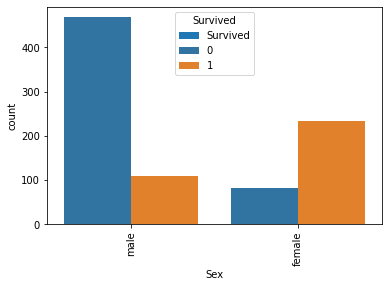

In [14]:
t_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()  #This plot is to determine the Sex and Survived passengers of the dataset 
sns.countplot('Sex', hue='Survived', data=t_data)
plt.show()

In [15]:
t_data['Sex'].value_counts() #This is to get the total number of male and female passengers in the dataset

male      577
female    314
Name: Sex, dtype: int64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

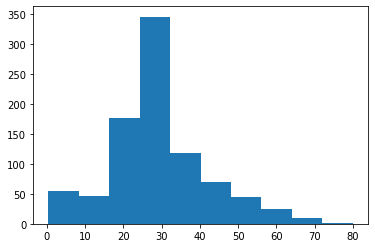

In [16]:
plt.hist(t_data['Age'], bins=None, range=None)  # To show the age count of passengers in the dataset 

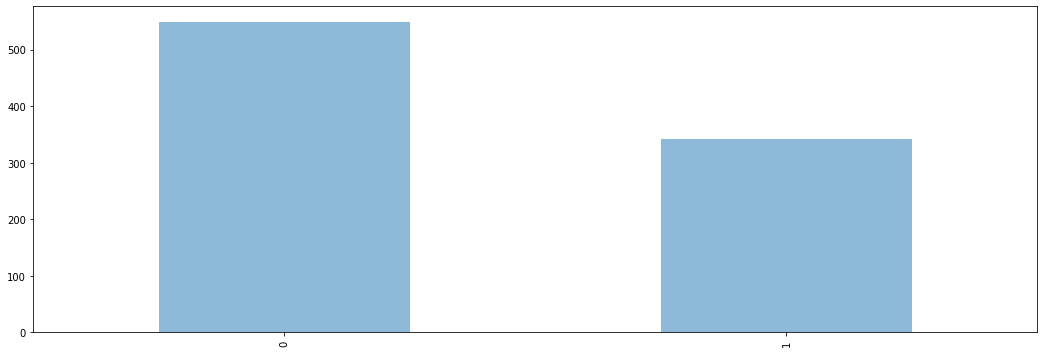

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,6))   

t_data.Survived.value_counts().plot(kind="bar",alpha=0.5)  #This is to determine the number of passengers that Survived 

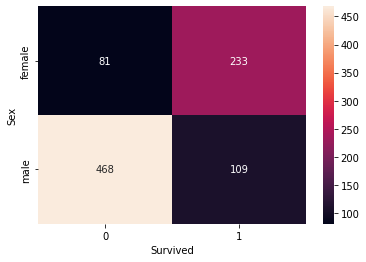

In [18]:
group = t_data.groupby(['Sex', 'Survived'])
sex_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.  #This shows the relationship between Sex and Survived
sns.heatmap(sex_survived, annot = True, fmt ="d")


In [68]:
t_data['age_category'] = pd.cut(t_data.Age, [-np.inf, 21, 41, 61, np.inf],
                              labels=['Infant', 'Youth', 'Mature', 'Old'])   #Creating the labels for age_category list in the dataset


In [62]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Youth
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Youth
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Infant
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Youth


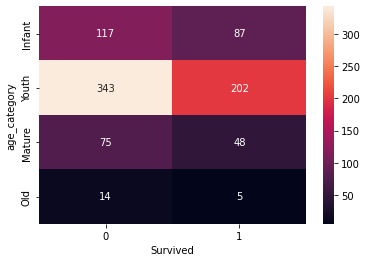

In [21]:
group = t_data.groupby(['age_category', 'Survived'])
age_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(age_survived, annot = True, fmt ="d")   #This shows the correlation between age_category and Survived


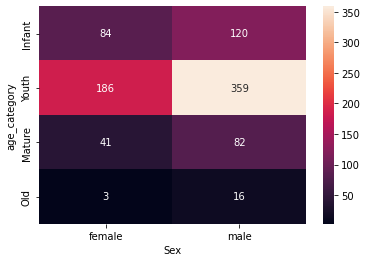

In [22]:
group = t_data.groupby(['age_category', 'Sex'])
age_sex = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(age_sex, annot = True, fmt ="d") # This shows the correlation between age_category and Sex


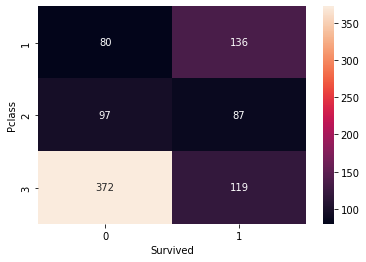

In [23]:
group = t_data.groupby(['Pclass', 'Survived'])
Pclass_Survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Pclass_Survived, annot = True, fmt ="d")  #This is to view the relationship between Pclass and Survived


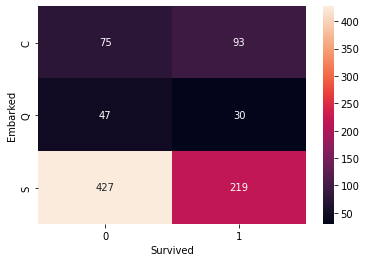

In [24]:
group = t_data.groupby(['Embarked', 'Survived'])
embarked_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(embarked_survived, annot = True, fmt ="d")  #This represents the entry point of passengers


In [64]:
t_data_2 = t_data[['Survived', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'age_category']] #To reference columns considered important and drop some columns like 'Name'

In [26]:
t_data_2 

,Survived,Age,Sex,Pclass,SibSp,Parch,Embarked,age_category
0,0,22.000000,male,3,1,0,S,Youth
1,1,38.000000,female,1,1,0,C,Youth
2,1,26.000000,female,3,0,0,S,Youth
3,1,35.000000,female,1,1,0,S,Youth
4,0,35.000000,male,3,0,0,S,Youth
...,...,...,...,...,...,...,...,...
886,0,27.000000,male,2,0,0,S,Youth
887,1,19.000000,female,1,0,0,S,Infant
888,0,29.699118,female,3,1,2,S,Youth
889,1,26.000000,male,1,0,0,C,Youth


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
t_data_2['age_category'] = encoder.fit_transform(t_data['age_category'])
t_data_2['Survived'] = encoder.fit_transform(t_data['Survived'])
t_data_2['Sex'] = encoder.fit_transform(t_data['Sex'])
t_data_2['Pclass'] = encoder.fit_transform(t_data['Pclass'])
t_data_2['SibSp'] = encoder.fit_transform(t_data['SibSp'])
t_data_2['Embarked'] = encoder.fit_transform(t_data['Embarked']) #Conversion of categorical data to numerical data using LabelEncoder

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [32]:
t_data_2

,Survived,Age,Sex,Pclass,SibSp,Parch,Embarked,age_category
0,0,22.000000,1,2,1,0,2,3
1,1,38.000000,0,0,1,0,0,3
2,1,26.000000,0,2,0,0,2,3
3,1,35.000000,0,0,1,0,2,3
4,0,35.000000,1,2,0,0,2,3
...,...,...,...,...,...,...,...,...
886,0,27.000000,1,1,0,0,2,3
887,1,19.000000,0,0,0,0,2,0
888,0,29.699118,0,2,1,2,2,3
889,1,26.000000,1,0,0,0,0,3


In [28]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax,

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

    )

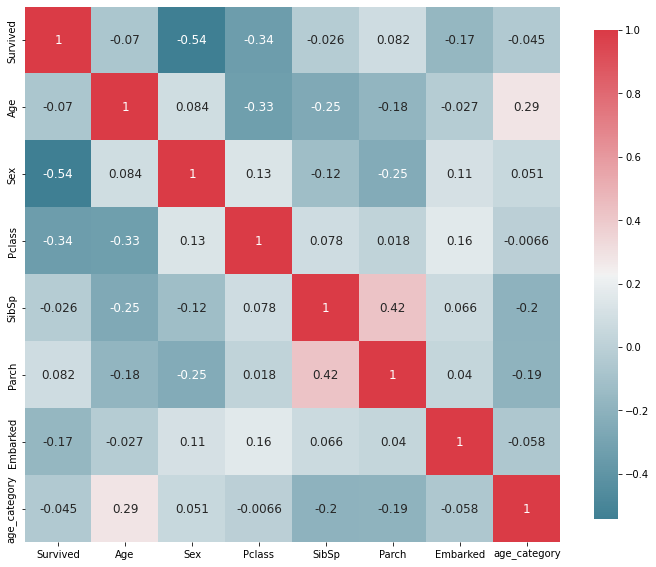

In [29]:
plot_correlation_map(t_data_2) #This is to show the correlation between the variables that are considered important having converted categorical data to numerical data

Correlation is a numerical description of the linear relationship between two variables. It describes the amount of change in one variable in response to a unit change in another variable. From the above cell, we can see both the positive, negative and zero relationships between all the variables in our datasets. 

In [41]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
t_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [43]:
a = []
for string in t_data['Name']:
    a.append(string.rsplit(', '))
a

[['Braund', 'Mr. Owen Harris'],
 ['Cumings', 'Mrs. John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen', 'Miss. Laina'],
 ['Futrelle', 'Mrs. Jacques Heath (Lily May Peel)'],
 ['Allen', 'Mr. William Henry'],
 ['Moran', 'Mr. James'],
 ['McCarthy', 'Mr. Timothy J'],
 ['Palsson', 'Master. Gosta Leonard'],
 ['Johnson', 'Mrs. Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Nasser', 'Mrs. Nicholas (Adele Achem)'],
 ['Sandstrom', 'Miss. Marguerite Rut'],
 ['Bonnell', 'Miss. Elizabeth'],
 ['Saundercock', 'Mr. William Henry'],
 ['Andersson', 'Mr. Anders Johan'],
 ['Vestrom', 'Miss. Hulda Amanda Adolfina'],
 ['Hewlett', 'Mrs. (Mary D Kingcome) '],
 ['Rice', 'Master. Eugene'],
 ['Williams', 'Mr. Charles Eugene'],
 ['Vander Planke', 'Mrs. Julius (Emelia Maria Vandemoortele)'],
 ['Masselmani', 'Mrs. Fatima'],
 ['Fynney', 'Mr. Joseph J'],
 ['Beesley', 'Mr. Lawrence'],
 ['McGowan', 'Miss. Anna "Annie"'],
 ['Sloper', 'Mr. William Thompson'],
 ['Palsson', 'Miss. Torborg Danira'],
 ['Asplund', 'Mrs. Carl Osc

In [44]:
b = []
for i, j in a:
    b.append(j.rsplit('.'))
    
b

[['Mr', ' Owen Harris'],
 ['Mrs', ' John Bradley (Florence Briggs Thayer)'],
 ['Miss', ' Laina'],
 ['Mrs', ' Jacques Heath (Lily May Peel)'],
 ['Mr', ' William Henry'],
 ['Mr', ' James'],
 ['Mr', ' Timothy J'],
 ['Master', ' Gosta Leonard'],
 ['Mrs', ' Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Mrs', ' Nicholas (Adele Achem)'],
 ['Miss', ' Marguerite Rut'],
 ['Miss', ' Elizabeth'],
 ['Mr', ' William Henry'],
 ['Mr', ' Anders Johan'],
 ['Miss', ' Hulda Amanda Adolfina'],
 ['Mrs', ' (Mary D Kingcome) '],
 ['Master', ' Eugene'],
 ['Mr', ' Charles Eugene'],
 ['Mrs', ' Julius (Emelia Maria Vandemoortele)'],
 ['Mrs', ' Fatima'],
 ['Mr', ' Joseph J'],
 ['Mr', ' Lawrence'],
 ['Miss', ' Anna "Annie"'],
 ['Mr', ' William Thompson'],
 ['Miss', ' Torborg Danira'],
 ['Mrs', ' Carl Oscar (Selma Augusta Emilia Johansson)'],
 ['Mr', ' Farred Chehab'],
 ['Mr', ' Charles Alexander'],
 ['Miss', ' Ellen "Nellie"'],
 ['Mr', ' Lalio'],
 ['Don', ' Manuel E'],
 ['Mrs', ' William Augustus (Marie Eugenie)'],
 ['

In [45]:
c = []
for x in b:
    c.append((x[0]))    
c


['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [74]:
t_data['Title'] = c
t_data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [50]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mr",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [71]:
Title_Dictionary

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Royalty',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Mme': 'Miss',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

In [75]:
# Using Dictionary to map new values.
t_data['Final_title'] = t_data['Title'].map(Title_Dictionary)
t_data['Final_title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Final_title, Length: 891, dtype: object

In [54]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Final_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr


In [76]:
t_data['Final_title'].value_counts() #This is to show the final title value count in the dataset


Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: Final_title, dtype: int64

In [77]:
t_data_2 = t_data[['Survived', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'age_category', 'Final_title']]  #Adding 'Final_title' to our t_data_2 

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
t_data_2['Final_title'] = encoder.fit_transform(t_data['Final_title'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


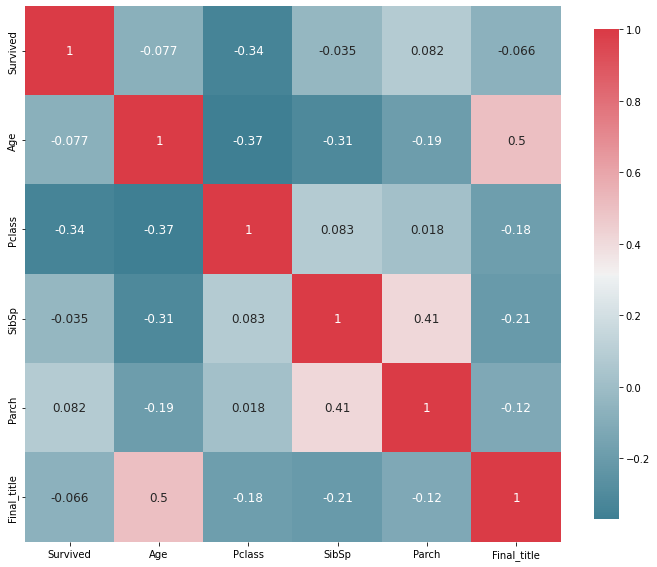

In [79]:
plot_correlation_map(t_data_2)
 #This captures all the correlation between all variables

In [81]:
t_data_2['Family_size'] = t_data_2['SibSp'] + t_data_2['Parch']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
t_data_2  # The updated T_data_2 showing all the important variables

,Survived,Age,Sex,Pclass,SibSp,Parch,Embarked,age_category,Final_title,Family_size
0,0,22.0,male,3,1,0,S,Youth,2,1
1,1,38.0,female,1,1,0,C,Youth,3,1
2,1,26.0,female,3,0,0,S,Youth,1,0
3,1,35.0,female,1,1,0,S,Youth,3,1
4,0,35.0,male,3,0,0,S,Youth,2,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,male,2,0,0,S,Youth,4,0
887,1,19.0,female,1,0,0,S,Infant,1,0
888,0,NaN,female,3,1,2,S,NaN,1,3
889,1,26.0,male,1,0,0,C,Youth,2,0


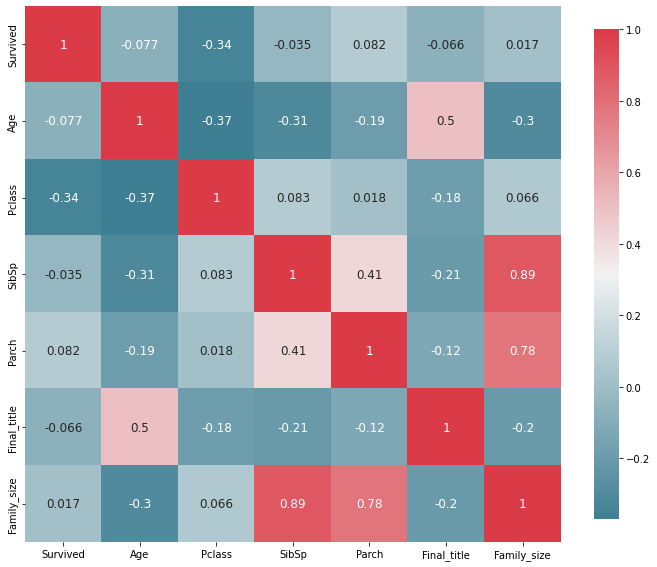

In [83]:
plot_correlation_map(t_data_2) #This shows that Family size at 0.017 to Survive has very little correlation. It is not a useful feature